In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [4]:
df=pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Mini project folder\Customer Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
null_counts = df.isnull().sum()
print(null_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
blank_counts = (df == "").sum()
print(blank_counts)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
if df.isnull().values.any() or (df == "").values.any():
    print("Dataset contains null or blank values.")
else:
    print("No null or blank values found.")


No null or blank values found.


converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

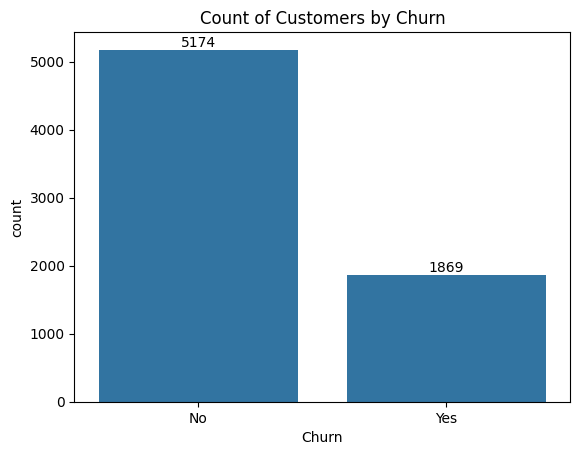

In [10]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

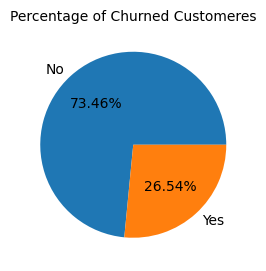

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

from the given pie chart we can conclude that 26.54% of our customers have churned out.

Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Feature Importance:
              Feature  Importance
4             tenure    0.167816
14          Contract    0.148611
18      TotalCharges    0.140311
17    MonthlyCharges    0.126667
8     OnlineSecurity    0.090679
11       TechSupport    0.070834
7    InternetService    0.051274
16     PaymentMethod    0.036748
9       OnlineBackup    0.028119
15  PaperlessBilling    0.019809
10  DeviceProtection    0.017478
6      MultipleLines    0.016891
1      SeniorCitizen    0.014541
13   StreamingMovies    0.014432
0             gender    0.013701
12       StreamingTV    0.012992
3         Dependents    0.012769
2            

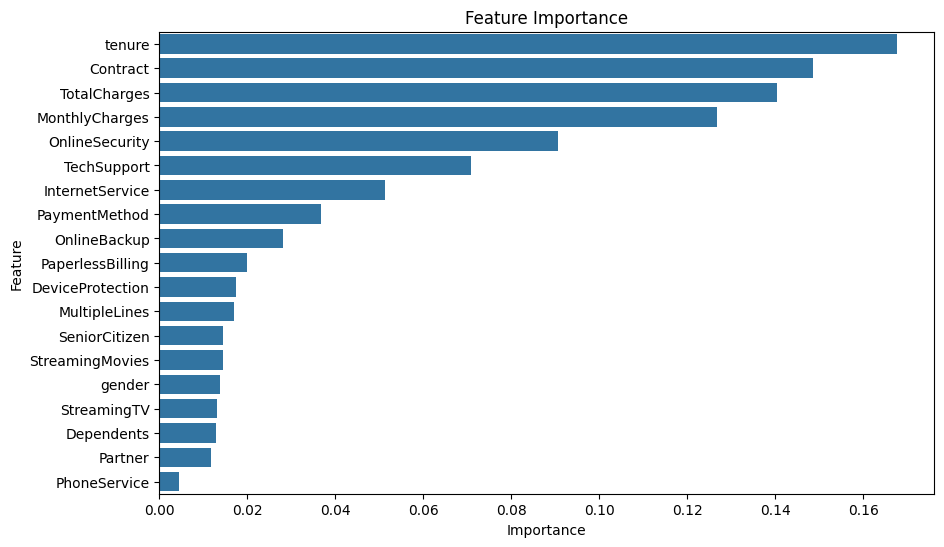

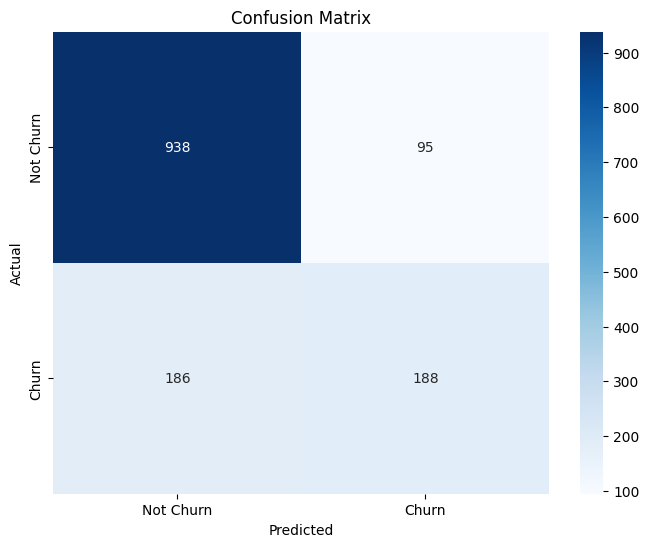

In [23]:
def load_data(filepath):
    if not os.path.exists(filepath):
        print("Error: File not found. Please check the path and filename.")
        return None
    df = pd.read_csv(filepath)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    df = df.dropna()
    return df

def preprocess_data(df):
    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols.remove("customerID")  
    
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    X = df.drop(columns=["Churn", "customerID"], axis=1)
    y = df["Churn"]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, scaler, label_encoders, X.columns

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return best_model, accuracy, report, y_test, y_pred

def feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df

def plot_feature_importance(feature_importance_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

if __name__ == "__main__":
    file_path = r"C:\Users\KIIT\OneDrive\Desktop\Mini project folder\Customer Churn.csv"
    df = load_data(file_path)
    
    if df is not None:
        X, y, scaler, label_encoders, feature_names = preprocess_data(df)
        model, accuracy, report, y_test, y_pred = train_model(X, y)
        
        print(f"Model Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", report)
        
        importance_df = feature_importance(model, feature_names)
        print("Feature Importance:\n", importance_df)
        
        plot_feature_importance(importance_df)
        plot_confusion_matrix(y_test, y_pred)

Customer Churn Prediction Using Random Forest and Feature Importance Analysis

Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Feature Importance (Linear SVM Coefficients):
              Feature  Importance
17    MonthlyCharges    0.864613
4             tenure    0.474334
7    InternetService    0.404171
18      TotalCharges    0.378245
5       PhoneService    0.278003
8     OnlineSecurity    0.201697
11       TechSupport    0.197187
14          Contract    0.162533
9       OnlineBackup    0.100565
15  PaperlessBilling    0.097641
1      SeniorCitizen    0.095348
10  DeviceProtection    0.074069
3         Dependents    0.068371
16     PaymentMethod    0.036516
2            Partner    0.036303
6      MultipleLines    0.034531
0             gender

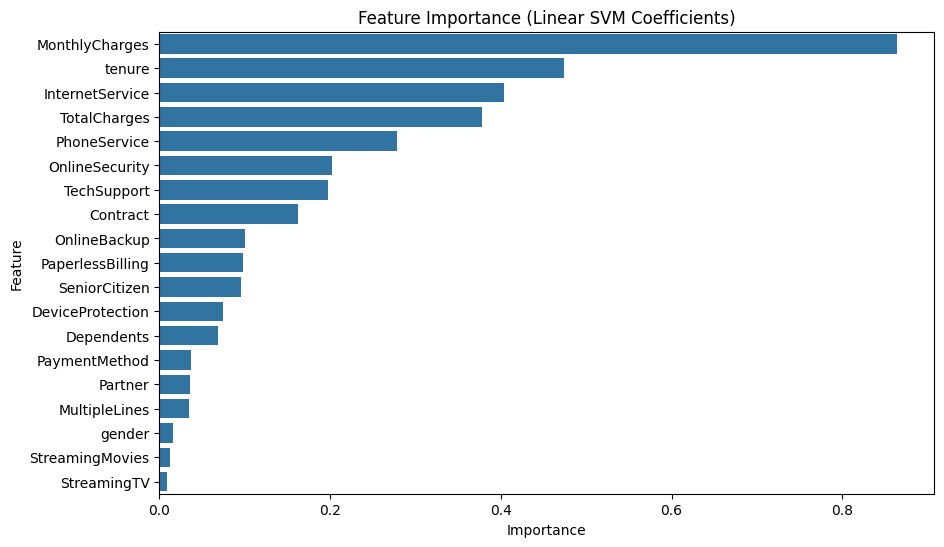

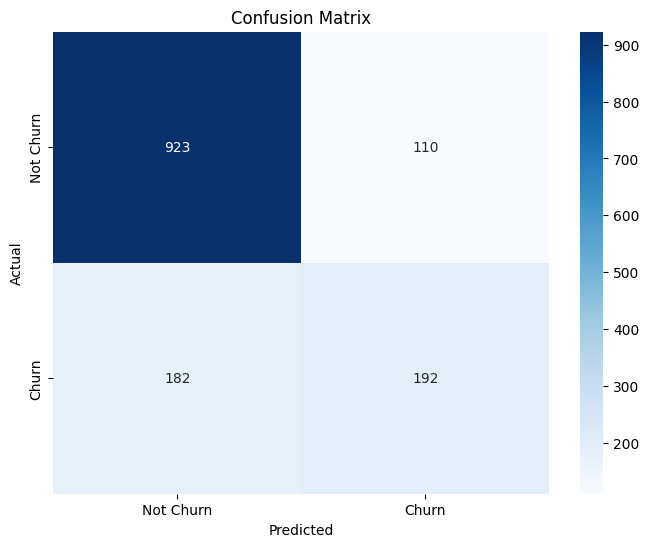

In [26]:
def load_data(filepath):
    if not os.path.exists(filepath):
        print("Error: File not found. Please check the path and filename.")
        return None
    df = pd.read_csv(filepath)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    df = df.dropna()
    return df

def preprocess_data(df):
    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols.remove("customerID")  
    
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    X = df.drop(columns=["Churn", "customerID"], axis=1)
    y = df["Churn"]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X) 
    
    return X_scaled, y, scaler, label_encoders, X.columns

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    param_grid = {
        'C': [0.1, 1, 10, 100],  
        'kernel': ['linear', 'rbf', 'poly'],  
        'gamma': ['scale', 'auto']  
    }
    
    svm = SVC(random_state=42)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return best_model, accuracy, report, y_test, y_pred

def feature_importance(model, feature_names):
    
    if model.kernel == 'linear':
        importance = np.abs(model.coef_[0])
    else:
        importance = np.zeros(len(feature_names))  
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df

def plot_feature_importance(feature_importance_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance (Linear SVM Coefficients)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

if __name__ == "__main__":
    file_path = r"C:\Users\KIIT\OneDrive\Desktop\Mini project folder\Customer Churn.csv"
    df = load_data(file_path)
    
    if df is not None:
        X, y, scaler, label_encoders, feature_names = preprocess_data(df)
        model, accuracy, report, y_test, y_pred = train_model(X, y)
        
        print(f"Model Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", report)
        
        importance_df = feature_importance(model, feature_names)
        print("Feature Importance (Linear SVM Coefficients):\n", importance_df)
        
        plot_feature_importance(importance_df)
        plot_confusion_matrix(y_test, y_pred)

Predicting Customer Loyalty: SVM-Based Churn Analysis with Optimized Hyperparameters

In [3]:
df=pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Mini project folder\Customer Churn.csv")

df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'customerID':  
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

X = df_encoded.drop(columns=['Churn', 'customerID'])
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8168914123491838
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



Decoding Customer Loyalty: Logistic Regression for Churn Prediction

In [6]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8062455642299503
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Optimizing Customer Retention: XGBoost-Based Churn Prediction